In [1]:
import warnings
warnings.filterwarnings('ignore')

# Machine() 정의

In [2]:
import numpy as np

In [3]:
def Machine(x,w,b):
    y_hat=(w*x)+b
    return y_hat

In [4]:
x=np.array([1,3,5,7,9])
w=2
b=1

In [5]:
Machine(x,w,b)

array([ 3,  7, 11, 15, 19])

# Gradient() 정의

In [7]:
def Gradient(x,y,w,b):
    y_hat=Machine(x,w,b)
    
    dw=np.mean((y-y_hat)*(-2*x))
    db=np.mean((y-y_hat)*(-2))
    
    return dw, db

In [9]:
y=np.array([2,4,6,8,10])

dw, db=Gradient(x,y,w,b)

In [10]:
print('dw is ', dw)
print('db is ', db)

dw is  66.0
db is  10.0


# Learning() 정의

In [12]:
def Learning(x,y,w,b,step):
    dw, db=Gradient(x,y,w,b)
    
    uw=w-step*dw
    ub=b-step*db
    
    return uw ,ub

In [13]:
step=0.05

uw, ub=Learning(x,y,w,b,step)

In [14]:
print('Updated_w is ','%.3f' % uw)
print('Updated_b is ','%.3f' % ub)

Updated_w is  -1.300
Updated_b is  0.500


# testData.csv에 적용

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
url='https://raw.githubusercontent.com/rusita-ai/pyData/master/testData.csv'
DATA=pd.read_csv(url)

In [17]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   inputs   5000 non-null   float64
 1   outputs  5000 non-null   float64
dtypes: float64(2)
memory usage: 78.2 KB


In [19]:
DATA.head()

,inputs,outputs
0,0.2362,0.162367
1,0.9415,0.479356
2,0.3495,0.095733
3,0.3200,-0.111783
4,0.8335,0.386012


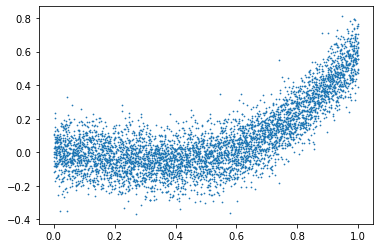

In [20]:
plt.scatter(DATA.inputs,DATA.outputs,s=0.5)

In [21]:
w=2
b=3
step=0.05

In [22]:
for i in range(0,1500):
    uw,ub=Learning(DATA.inputs,DATA.outputs,w,b,step)
    w=uw
    b=ub

In [23]:
print('Learned_w is ','%.3f' % w)
print('Learned_b is ', '%.3f' % b)

Learned_w is  0.505
Learned_b is  -0.170


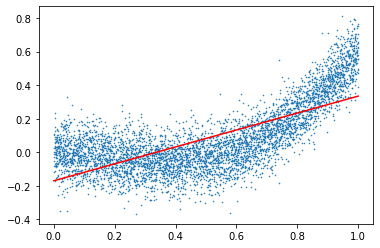

In [24]:
X=np.linspace(0,1,100)
Y=(w*X)+b

plt.scatter(DATA.inputs,DATA.outputs,s=0.3)
plt.plot(X,Y,'-r',linewidth=1.5)
plt.show()

# Loss Visualization

In [38]:
def Gradient(x,y,w,b):
    y_hat=Machine(x,w,b)
    
    dw=np.mean((y-y_hat)*(-2*x))
    db=np.mean((y-y_hat)*(-2))
    Loss=np.mean((y-y_hat)**2)
    
    return dw, db, Loss

In [39]:
def Learning(x,y,w,b,step):
    dw, db, Loss=Gradient(x,y,w,b)
    
    uw=w-step*dw
    ub=b-step*db
    
    Loss=Loss
    
    return uw ,ub, Loss

In [40]:
w=2
b=3
step=0.001
Error=[]

In [41]:
for i in range(0,1500):
    uw,ub, Loss=Learning(DATA.inputs,DATA.outputs,w,b,step)
    w=uw
    b=ub
    Error.append(Loss)

In [42]:
Error[0:10]

[15.595575679087696,
 15.516493615452518,
 15.437813155278901,
 15.359532259084617,
 15.28164889774523,
 15.204161052440144,
 15.127066714601533,
 15.050363885861731,
 14.97405057800144,
 14.898124812898125]

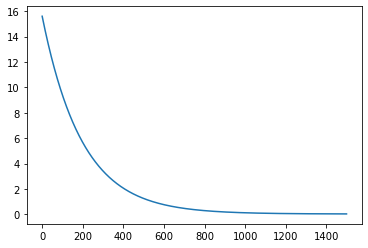

In [43]:
plt.plot(Error)
plt.show()

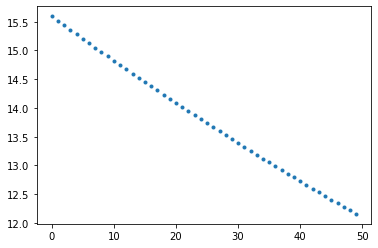

In [44]:
plt.plot(Error[0:50],'.')
plt.show()

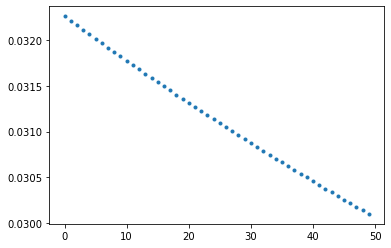

In [52]:
plt.plot(Error[1450:1500],'.')
plt.show()